### [마법의 엘리베이터](https://school.programmers.co.kr/learn/courses/30/lessons/148653)

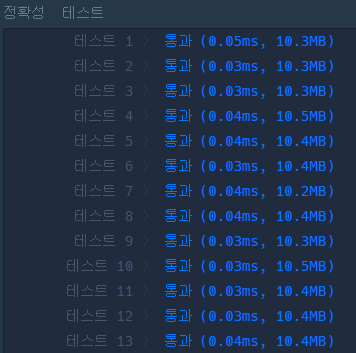

In [41]:
def solution(storey):
    answer = 0
    storey = str(storey)
    i = 0
    while True:
        i += 1
        N = len(storey)
        if i == N+1:
            break
        target = int(storey[-i])
        if target < 5 or i == N:
            answer += min(target, 11-target)
        elif target > 5:
            storey = str(int(storey[:-i]) + 1) + storey[-i:]
            answer += 10 - target
        elif target == 5:                
            for j in range(i+1, len(storey)+1):
                n_target = int(storey[-j])
                if n_target >= 5:
                    # print(f'{j=}, {storey=}')
                    storey = str(int(storey[:-i]) + 1) + storey[-i:]
                    break
                elif n_target < 5:
                    break
            answer += 5
        # print(f'{storey=}, {answer=}')
    return answer

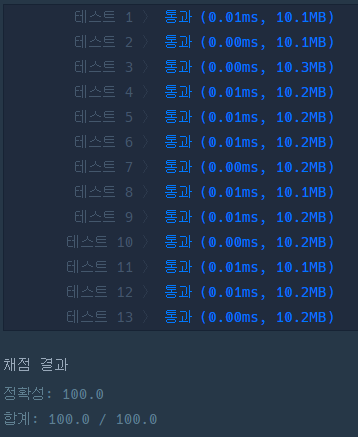

In [132]:
def solution(storey):
    answer = 0
    while storey > 0:
        storey, moves = divmod(storey, 10) # 뒤에서부터 카운트
        if moves > 5 or (moves == 5 and storey % 10 >= 5): # 숫자를 올리는게 최적인 경우
            moves = 10 - moves
            storey += 1
        answer += moves
    return answer

In [123]:
from collections import deque

def solution(storey):
    queue = deque([(storey, 1, 0)]) # (number, step, answer)
    high = 10 ** len(str(storey)) + 1
    history = [False] * high
    history[storey] = False
    while queue:
        num, step, answer = queue.popleft()
        
        if step == len(str(num)):
            
        target = int(str(num)[-step])
        
        # plus
        cnt = 10 - target
        new = num + cnt
        value = answer + cnt
        if 0 <= new < high and (not history[new] or value < history[new]) :
            print("\nplus", new)
            history[new] = value
            if step < len(str(new)):
                queue.append((new, step+1, value))
                    
        # minus
        cnt = target
        new = num - cnt
        value = answer + cnt
        if 0 <= new < high and (not history[new] or value < history[new]) :
            print("minus", new)
            history[new] = value
            if step < len(str(new)):
                queue.append((new, step+1, value))

    return history[1560]

In [124]:
solution(1555)


plus 1560
minus 1550

plus 1564
minus 1554

plus 1555
minus 1545

plus 1569
minus 1559
minus 1549
minus 1540

plus 1578
minus 1568
minus 1558
minus 1548
minus 1539


5